In [883]:
'''
Churned: Customers who have left the service.   i.e Yes

Not Churned: Customers who have stayed with the service  i.e No 


'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#matplotlib.pyplot and seaborn for creating visualizations
df = pd.read_csv('Customer Churnnew.csv')
df.head()

,customerID,gender,SeniorCitizen,Period,PhoneService,InternetService,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,Contract,PaymentMethod,MonthlyCharges,Churn
0,7590-VHVEG,Female,0,1.0,No,DSL,Yes,No,No,No,Month-to-month,Electronic check,29.85,No
1,5575-GNVDE,Male,0,34.0,Yes,DSL,No,Yes,No,No,One year,Mailed check,56.95,No
2,3668-QPYBK,Male,0,2.0,Yes,DSL,Yes,No,No,No,Month-to-month,Mailed check,53.85,Yes
3,7795-CFOCW,Male,0,45.0,No,DSL,No,Yes,Yes,No,One year,Bank transfer (automatic),42.30,No
4,9237-HQITU,Female,0,2.0,Yes,Fiber optic,No,No,No,No,Month-to-month,Electronic check,70.70,Yes


In [884]:
df.dtypes


customerID           object
gender               object
SeniorCitizen         int64
Period              float64
PhoneService         object
InternetService      object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
Contract             object
PaymentMethod        object
MonthlyCharges      float64
Churn                object
dtype: object

In [885]:
df.shape

(7043, 14)

In [886]:
df.isnull().sum()


customerID            0
gender                0
SeniorCitizen         0
Period              140
PhoneService          0
InternetService       0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
Contract              0
PaymentMethod         0
MonthlyCharges      140
Churn               140
dtype: int64

In [887]:
print(df['Churn'].unique())


['No' 'Yes' nan]


In [888]:
'''
Drop Rows with Missing Target Column (Churn)
We shouldn't predict if we don't know whether a customer churned.

'''
df = df.dropna(subset=['Churn'])
df.isnull().sum()


customerID            0
gender                0
SeniorCitizen         0
Period              136
PhoneService          0
InternetService       0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
Contract              0
PaymentMethod         0
MonthlyCharges      138
Churn                 0
dtype: int64

In [889]:
df.shape

(6903, 14)

In [890]:

df[['Period', 'MonthlyCharges']] = df[['Period', 'MonthlyCharges']].apply(
    lambda col: col.fillna(col.median())
)
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Period              0
PhoneService        0
InternetService     0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
Contract            0
PaymentMethod       0
MonthlyCharges      0
Churn               0
dtype: int64

In [891]:
df = df.drop_duplicates()


In [892]:
df.reset_index(drop=True, inplace=True)

In [893]:
'''
1. customerID:
   Type: Unique identifier
   Description: A unique code or number assigned to each customer to track their account.

2. gender:
   Type: Categorical (e.g., "Male", "Female")
   Description: The gender of the customer.

3. SeniorCitizen:
   Type: Categorical (e.g., "0" = No, "1" = Yes)
   Description: Indicates whether the customer is a senior citizen (typically aged 65 and above).

4. Period:
   Type: Continuous (integer number of months)
   Description: Number of months the customer has been with the company.

5. PhoneService:
   Type: Categorical (e.g., "Yes", "No")
   Description: Indicates whether the customer has a phone service with the company.

6. InternetService:
   Type: Categorical (e.g., "DSL", "Fiber optic", "No")
   Description: Type of internet service the customer has.

7. DeviceProtection:
   Type: Categorical (e.g., "Yes", "No")
   📊 Why it matters: Customers with device protection may feel more secure, potentially reducing churn.
   Description: Indicates whether the customer has device protection (e.g., against damage or theft).

8. TechSupport:
   Type: Categorical (e.g., "Yes", "No")
   Description: Indicates whether the customer has tech support for technical issues.

9. StreamingTV:
   Type: Categorical (e.g., "Yes", "No")
   Description: Indicates whether the customer has a TV streaming service.

10. Contract:
    Type: Categorical (e.g., "Month-to-month", "One year", "Two year")
    Description: Type of contract the customer is on.

11. PaymentMethod:
    Type: Categorical (e.g., "Electronic check", "Mailed check", "Bank transfer", "Credit card")
    Description: Method by which the customer pays their bill.

12. MonthlyCharges:
    Type: Continuous (numeric)
    Description: Monthly subscription charges billed to the customer.

13. Churn:
    Type: Categorical (e.g., "Yes", "No")
    Description: Indicates if the customer has churned (left the service).
    📊 Why it matters: This is your **target variable** for churn prediction models.








Partner,Dependents,TotalCharges,OnlineSecurity,StreamingMovies,PaperlessBilling,MultipleLines


Partner,dependents,Total charges ,Online Security,streamingmovies,Peperless billing,multiplelines
Tenure=>period


'''



'\n1. customerID:\n   Type: Unique identifier\n   Description: A unique code or number assigned to each customer to track their account.\n\n2. gender:\n   Type: Categorical (e.g., "Male", "Female")\n   Description: The gender of the customer.\n\n3. SeniorCitizen:\n   Type: Categorical (e.g., "0" = No, "1" = Yes)\n   Description: Indicates whether the customer is a senior citizen (typically aged 65 and above).\n\n4. Period:\n   Type: Continuous (integer number of months)\n   Description: Number of months the customer has been with the company.\n\n5. PhoneService:\n   Type: Categorical (e.g., "Yes", "No")\n   Description: Indicates whether the customer has a phone service with the company.\n\n6. InternetService:\n   Type: Categorical (e.g., "DSL", "Fiber optic", "No")\n   Description: Type of internet service the customer has.\n\n7. DeviceProtection:\n   Type: Categorical (e.g., "Yes", "No")\n   📊 Why it matters: Customers with device protection may feel more secure, potentially reducing

In [894]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6903 entries, 0 to 6902
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        6903 non-null   object 
 1   gender            6903 non-null   object 
 2   SeniorCitizen     6903 non-null   int64  
 3   Period            6903 non-null   float64
 4   PhoneService      6903 non-null   object 
 5   InternetService   6903 non-null   object 
 6   OnlineBackup      6903 non-null   object 
 7   DeviceProtection  6903 non-null   object 
 8   TechSupport       6903 non-null   object 
 9   StreamingTV       6903 non-null   object 
 10  Contract          6903 non-null   object 
 11  PaymentMethod     6903 non-null   object 
 12  MonthlyCharges    6903 non-null   float64
 13  Churn             6903 non-null   object 
dtypes: float64(2), int64(1), object(11)
memory usage: 755.1+ KB


In [895]:
df.isnull().sum().sum()


0

#replacing blanks with 0 as tenure is 0 and no total charges are recorded 

In [896]:

df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Period              0
PhoneService        0
InternetService     0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
Contract            0
PaymentMethod       0
MonthlyCharges      0
Churn               0
dtype: int64

In [897]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6903 entries, 0 to 6902
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        6903 non-null   object 
 1   gender            6903 non-null   object 
 2   SeniorCitizen     6903 non-null   int64  
 3   Period            6903 non-null   float64
 4   PhoneService      6903 non-null   object 
 5   InternetService   6903 non-null   object 
 6   OnlineBackup      6903 non-null   object 
 7   DeviceProtection  6903 non-null   object 
 8   TechSupport       6903 non-null   object 
 9   StreamingTV       6903 non-null   object 
 10  Contract          6903 non-null   object 
 11  PaymentMethod     6903 non-null   object 
 12  MonthlyCharges    6903 non-null   float64
 13  Churn             6903 non-null   object 
dtypes: float64(2), int64(1), object(11)
memory usage: 755.1+ KB


In [898]:
df.isnull().sum().sum()

0

In [899]:
df.describe()

,SeniorCitizen,Period,MonthlyCharges
count,6903.000000,6903.000000,6903.000000
mean,0.161234,32.316384,64.826554
std,0.367774,24.329094,29.795809
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,36.550000
50%,0.000000,29.000000,70.300000
75%,0.000000,55.000000,89.650000
max,1.000000,72.000000,118.750000


In [900]:
df["customerID"].duplicated().sum()
#check if customer id is duplicated or not

0

In [901]:
#convert 0 to no and 1 To yes In Senior citizen column 

def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"

df['SeniorCitizen'] = df["SeniorCitizen"].apply(conv)
df['SeniorCitizen'].head()

0    no
1    no
2    no
3    no
4    no
Name: SeniorCitizen, dtype: object

#converted 0 and 1 values of senior citizen to yes/no to make it easier to understand

In [902]:
df.to_csv("Customer churncleaned.csv")

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10824\1220480549.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = 'Churn', data = df,palette={'No':'blue','Yes':'red'})


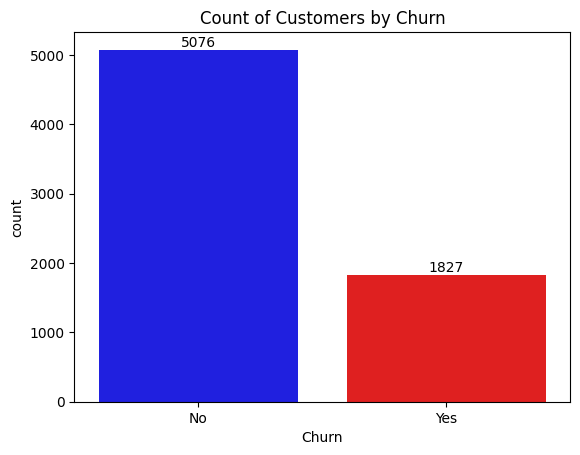

In [903]:
ax = sns.countplot(x = 'Churn', data = df,palette={'No':'blue','Yes':'red'})

ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Count of Customers by Churn")
plt.show()

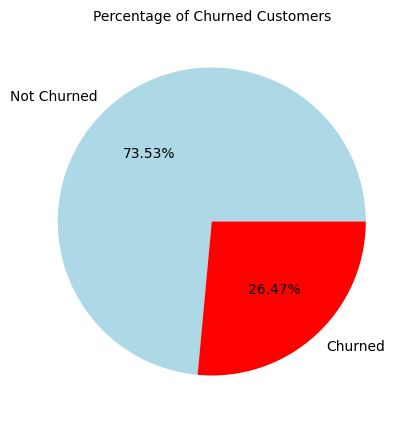

'\n\n1)plt.figure(figsize=(3, 4))\n→ Sets the size of the chart to 3 inches wide and 4 inches tall.\n\n2)gb = df.groupby("Churn").agg({\'Churn\':"count"})\n→ Groups the data by the "Churn" column ("Yes" for churned, "No" for not churned) and counts how many customers fall into each category.\n\n3)plt.pie(gb[\'Churn\'], labels=gb.index, autopct="%1.2f%%")\n→ Plots a pie chart using the counts:\n\nlabels=gb.index means the chart slices are labeled as "Yes" and "No".\n\nautopct="%1.2f%%" shows the exact percentage for each slice with 2 decimal points.\n\n4)plt.title("Percentage of Churned Customers", fontsize=10)\n→ Adds a title to the chart with a font size of 10.\n\n5)plt.show()\n→ Displays the final pie chart showing the proportion of churned ("Yes") vs not churned ("No") customer\n'

In [904]:
import matplotlib.pyplot as plt

# Group and count Churn values
gb = df['Churn'].value_counts().sort_index()  # Ensures 0 comes before 1

# Map labels
labels = ['Not Churned', 'Churned']  # Corresponding to 0 and 1
colors = ['lightblue', 'red']             # 0: blue, 1: red

# Create pie chart
plt.figure(figsize=(5, 5))
plt.pie(gb, labels=labels, autopct="%1.2f%%", colors=colors)
plt.title("Percentage of Churned Customers", fontsize=10)
plt.show()



'''

1)plt.figure(figsize=(3, 4))
→ Sets the size of the chart to 3 inches wide and 4 inches tall.

2)gb = df.groupby("Churn").agg({'Churn':"count"})
→ Groups the data by the "Churn" column ("Yes" for churned, "No" for not churned) and counts how many customers fall into each category.

3)plt.pie(gb['Churn'], labels=gb.index, autopct="%1.2f%%")
→ Plots a pie chart using the counts:

labels=gb.index means the chart slices are labeled as "Yes" and "No".

autopct="%1.2f%%" shows the exact percentage for each slice with 2 decimal points.

4)plt.title("Percentage of Churned Customers", fontsize=10)
→ Adds a title to the chart with a font size of 10.

5)plt.show()
→ Displays the final pie chart showing the proportion of churned ("Yes") vs not churned ("No") customer
'''

#from the given pie chart we can conclude that 26.54% of our customers have churned out. 
#not let's explore the reason behind it

In [905]:
df.head()

,customerID,gender,SeniorCitizen,Period,PhoneService,InternetService,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,Contract,PaymentMethod,MonthlyCharges,Churn
0,7590-VHVEG,Female,no,1.0,No,DSL,Yes,No,No,No,Month-to-month,Electronic check,29.85,No
1,5575-GNVDE,Male,no,34.0,Yes,DSL,No,Yes,No,No,One year,Mailed check,56.95,No
2,3668-QPYBK,Male,no,2.0,Yes,DSL,Yes,No,No,No,Month-to-month,Mailed check,53.85,Yes
3,7795-CFOCW,Male,no,45.0,No,DSL,No,Yes,Yes,No,One year,Bank transfer (automatic),42.30,No
4,9237-HQITU,Female,no,2.0,Yes,Fiber optic,No,No,No,No,Month-to-month,Electronic check,70.70,Yes


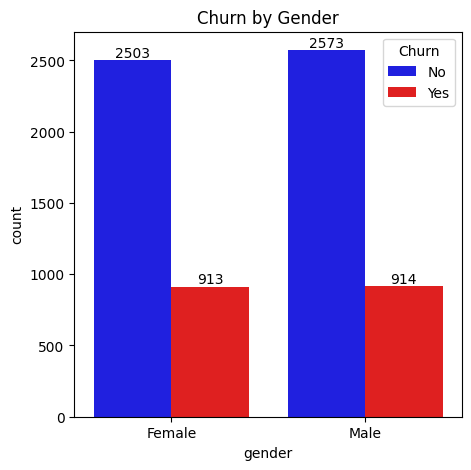

'\n\n👉 What does hue mean (in plots like seaborn)?\nIn plotting libraries like Seaborn, the hue parameter is used to split data into subgroups based on a categorical variable, and then assign different colors to those subgroups in the same plot.\n\n📌 Think of it like this:\nhue = \'Churn\' means:\n“Color-code the plot based on whether customers churned (Yes) or did not churn (No).”\n\n🧠 Why it\'s useful:\nIt lets you compare subgroups visually.\n\nHelps spot patterns (e.g., more churn for certain services, payment methods, etc.).\n\n\n\n\n=>sns.countplot(x="gender", data=df, hue="Churn")\n    This means:\n\n    For each gender (Male and Female),\n\n    Count how many customers are:\n\n    Churned (Churn = Yes) 2549 +2625\n\n    Not Churned (Churn = No) 939 +930 \n\nNo     5174\nYes    1869\n\nfor male and female it devides into two part .\n'

In [906]:
plt.figure(figsize = (5,5))
ax=sns.countplot(x = "gender", data = df, hue = "Churn",palette = {'No': 'blue', 'Yes': 'red'})  #
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churn by Gender")
plt.show()


'''

👉 What does hue mean (in plots like seaborn)?
In plotting libraries like Seaborn, the hue parameter is used to split data into subgroups based on a categorical variable, and then assign different colors to those subgroups in the same plot.

📌 Think of it like this:
hue = 'Churn' means:
“Color-code the plot based on whether customers churned (Yes) or did not churn (No).”

🧠 Why it's useful:
It lets you compare subgroups visually.

Helps spot patterns (e.g., more churn for certain services, payment methods, etc.).




=>sns.countplot(x="gender", data=df, hue="Churn")
    This means:

    For each gender (Male and Female),

    Count how many customers are:

    Churned (Churn = Yes) 2549 +2625

    Not Churned (Churn = No) 939 +930 

No     5174
Yes    1869

for male and female it devides into two part .
'''

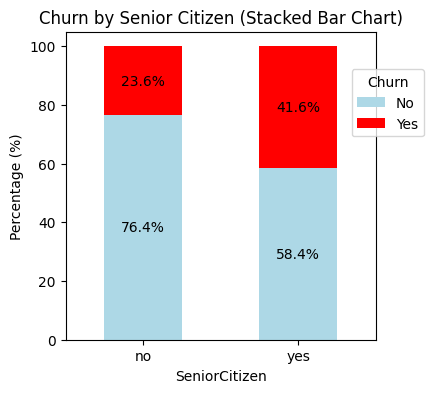

In [907]:
total_counts = df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack() * 100

# Plot
fig, ax = plt.subplots(figsize=(4, 4))  # Adjust figsize for better visualization

# Plot the bars
total_counts.plot(kind='bar', stacked=True, ax=ax, color=['lightblue', 'Red'])  # Customize colors if desired

# Add percentage labels on the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center')

plt.title('Churn by Senior Citizen (Stacked Bar Chart)')
plt.xlabel('SeniorCitizen')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(title='Churn', bbox_to_anchor = (0.9,0.9))  # Customize legend location

plt.show()




# plt.figure(figsize = (5,5))
# ax = sns.countplot(x = "SeniorCitizen", data = df, hue = "Churn" )
# ax.bar_label(ax.containers[0])
# ax.bar_label(ax.containers[1])
# plt.title("Count of Customers by SeniorCitizen")
# plt.show()

#comparative a greater pecentage of people in senior citizen category have churned

#people who have used our services for a long time have stayed and people who have used our sevices 
#1 or 2 months  have churned

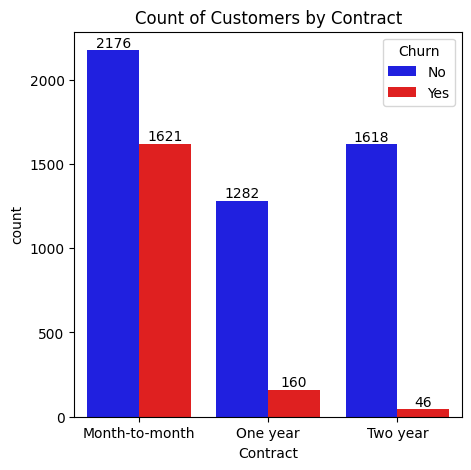

In [908]:
plt.figure(figsize = (5,5))
ax = sns.countplot(x = "Contract", data = df, hue = "Churn",palette = {'No': 'blue', 'Yes': 'red'})
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Count of Customers by Contract")
plt.show()

In [909]:
#people who have month to month contract are likely to churn than from those who have 1 or 2 years or contract. 

In [910]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Period', 'PhoneService',
       'InternetService', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'Contract', 'PaymentMethod',
       'MonthlyCharges', 'Churn'], dtype=object)

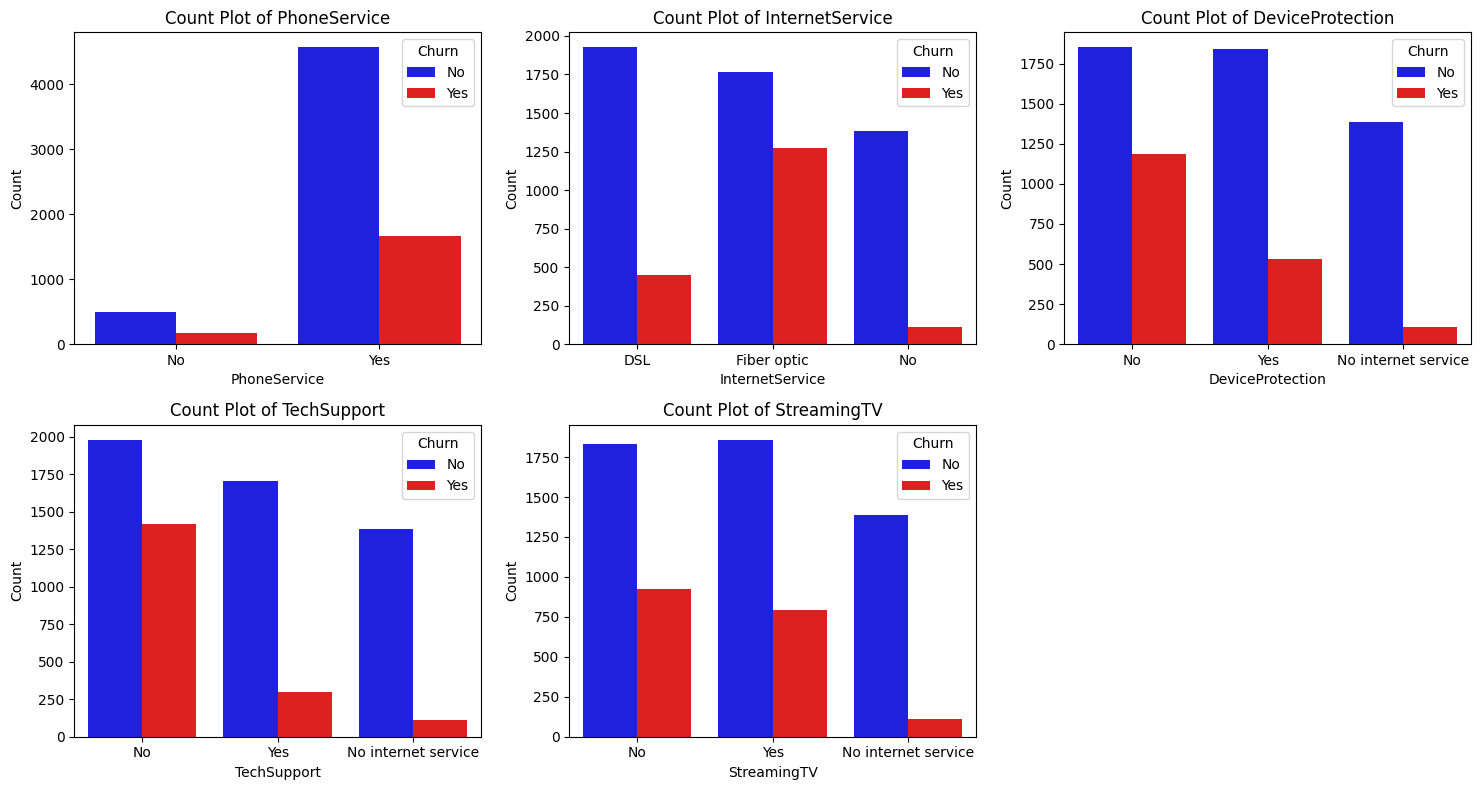

In [911]:
import matplotlib.pyplot as plt
import seaborn as sns

# Columns to include (excluding those you wanted deleted)
columns = ['PhoneService', 'InternetService', 'DeviceProtection',
           'TechSupport', 'StreamingTV']

# Number of columns for the subplot grid
n_cols = 3
n_rows = (len(columns) + n_cols - 1) // n_cols  # Calculate number of rows needed

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))  # Adjust figsize as needed

# Flatten the axes array
axes = axes.flatten()

# Plot countplots
for i, col in enumerate(columns):
    sns.countplot(x=col, data=df, ax=axes[i], hue=df["Churn"],palette = {'No': 'blue', 'Yes': 'red'})
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


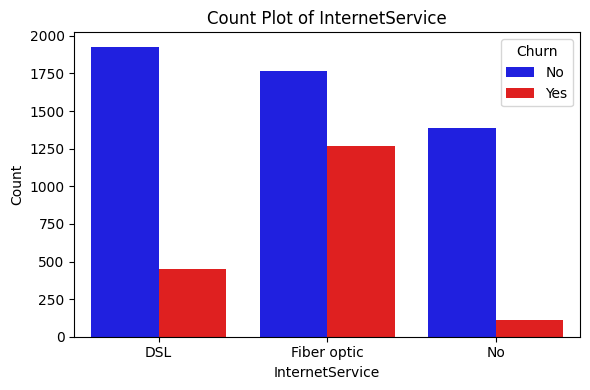

In [912]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(
    x='InternetService',
    data=df,
    hue='Churn',
    palette={'No': 'blue', 'Yes': 'red'}
)

plt.title('Count Plot of InternetService')
plt.xlabel('InternetService')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


#The majority of customers who do not churn tend to have services like PhoneService, InternetService (particularly DSL), and OnlineSecurity enabled. For services like OnlineBackup, TechSupport, and StreamingTV, churn rates are noticeably higher when these services are not used or are unavailable. 

In [913]:
df.shape

(6903, 14)

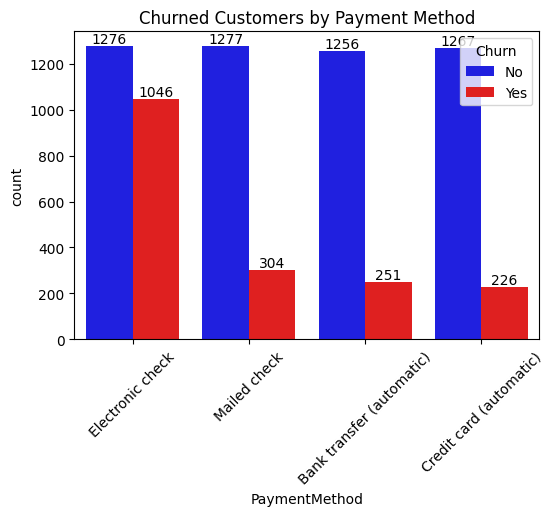

In [914]:
plt.figure(figsize = (6,4))
ax = sns.countplot(x = "PaymentMethod", data = df, hue = "Churn",palette = {'No': 'blue', 'Yes': 'red'})
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churned Customers by Payment Method")
plt.xticks(rotation = 45)
plt.show()

#customer is likely to churn when he is using electronic check as a payment method. 

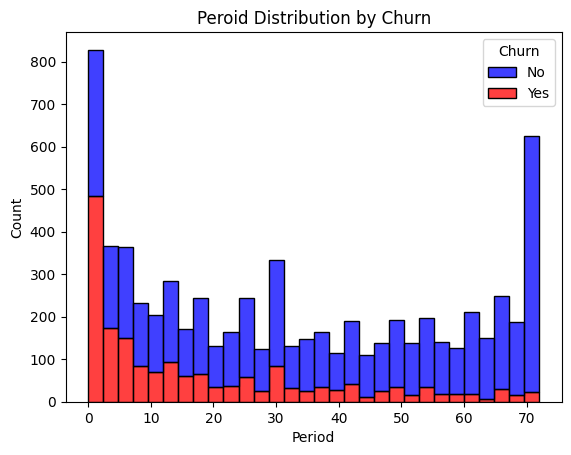

In [915]:

# Period vs Churn
sns.histplot(data=df, x='Period', hue='Churn', multiple='stack', bins=30,palette = {'No': 'blue', 'Yes': 'red'})
plt.title("Peroid Distribution by Churn")
plt.show()


### A bar chart that shows how customer churn varies across different monthly billing amounts

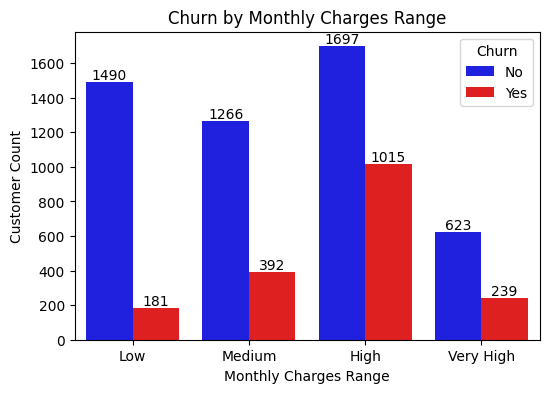

   customerID  gender SeniorCitizen  Period PhoneService InternetService  \
0  7590-VHVEG  Female            no     1.0           No             DSL   
1  5575-GNVDE    Male            no    34.0          Yes             DSL   
2  3668-QPYBK    Male            no     2.0          Yes             DSL   
3  7795-CFOCW    Male            no    45.0           No             DSL   
4  9237-HQITU  Female            no     2.0          Yes     Fiber optic   

  OnlineBackup DeviceProtection TechSupport StreamingTV        Contract  \
0          Yes               No          No          No  Month-to-month   
1           No              Yes          No          No        One year   
2          Yes               No          No          No  Month-to-month   
3           No              Yes         Yes          No        One year   
4           No               No          No          No  Month-to-month   

               PaymentMethod  MonthlyCharges Churn ChargeBin  
0           Electronic check 

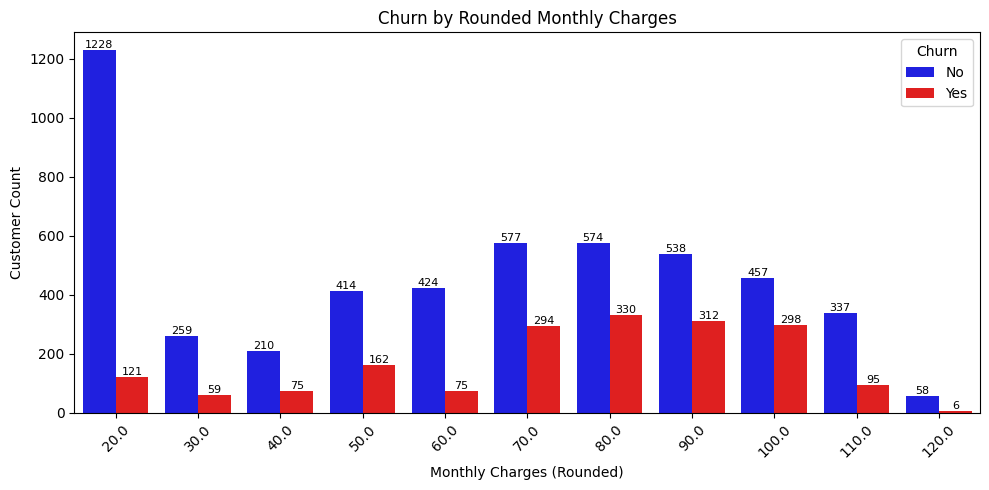

"\n1)\ndf['RoundedCharges'] = df['MonthlyCharges'].round(-1)  # e.g., 67 → 70\nWhat it does: Rounds the MonthlyCharges to the nearest 10.\nExample: 67 → 70, 83 → 80, 105 → 110\nWhy: To group similar charges together and reduce the number of unique values. This makes the bar chart cleaner and more meaningful.\n\n\n2)\nCreate the Count Plot\n\nplt.figure(figsize=(10, 5))\nax = sns.countplot(x='RoundedCharges', hue='Churn', data=df)\n\n# plt.figure(figsize=(10, 5)): Sets the size of the plot (10 inches wide, 5 inches tall).\n# sns.countplot():\n   -x='RoundedCharges': Groups bars by the rounded charges./grouped RoundedCharges (e.g., $60, $70, $80)\n   -hue='Churn': Splits each bar into two segments: Churned vs Not Churned or Why: To compare how churn behavior varies across different charge amounts.\n   -Each bar shows the number of customers paying a certain monthly charge and whether they churned.\n\n\n3)\n\n"

In [916]:


# Create bins for Monthly Charges
df['ChargeBin'] = pd.cut(df['MonthlyCharges'], 
                         bins=[0, 35, 70, 100, 140], 
                         labels=['Low', 'Medium', 'High', 'Very High'])

# Plot churn by Monthly Charges bin
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='ChargeBin', hue='Churn', data=df,palette = {'No': 'blue', 'Yes': 'red'})
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churn by Monthly Charges Range") #🖼️ Adds a title and axis labels, and then displays the chart.
plt.xlabel("Monthly Charges Range")  #🖼️ Adds a title and axis labels, and then displays the chart.
plt.ylabel("Customer Count")  #🖼️ Adds a title and axis labels, and then displays the chart.
plt.show()
print(df.head())

'''
 Creates a count plot:

x='ChargeBin' → groups by the charge range

hue='Churn' → uses color to show how many churned (Yes or No)

'''



#==============================================================================================

df['RoundedCharges'] = df['MonthlyCharges'].round(-1)  # e.g., 67 → 70

# Plot using countplot
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='RoundedCharges', hue='Churn', data=df,palette = {'No': 'blue', 'Yes': 'red'})
ax.bar_label(ax.containers[0], label_type='edge', fontsize=8)
ax.bar_label(ax.containers[1], label_type='edge', fontsize=8)
plt.title("Churn by Rounded Monthly Charges")
plt.xlabel("Monthly Charges (Rounded)")
plt.ylabel("Customer Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



'''
1)
df['RoundedCharges'] = df['MonthlyCharges'].round(-1)  # e.g., 67 → 70
What it does: Rounds the MonthlyCharges to the nearest 10.
Example: 67 → 70, 83 → 80, 105 → 110
Why: To group similar charges together and reduce the number of unique values. This makes the bar chart cleaner and more meaningful.


2)
Create the Count Plot

plt.figure(figsize=(10, 5))
ax = sns.countplot(x='RoundedCharges', hue='Churn', data=df)

# plt.figure(figsize=(10, 5)): Sets the size of the plot (10 inches wide, 5 inches tall).
# sns.countplot():
   -x='RoundedCharges': Groups bars by the rounded charges./grouped RoundedCharges (e.g., $60, $70, $80)
   -hue='Churn': Splits each bar into two segments: Churned vs Not Churned or Why: To compare how churn behavior varies across different charge amounts.
   -Each bar shows the number of customers paying a certain monthly charge and whether they churned.


3)

'''

# 📊 Business Insights from Customer Churn Data

---

## ✅ Key Customer Behavior Insights

### 1. **Overall Churn Rate**
- A notable percentage of customers have churned.
- **Insight**: Indicates a challenge in customer retention.
- **Action**: Analyze churn causes and design effective retention campaigns.

---

### 2. **Contract Type**
- **Month-to-month** customers churn at a much higher rate.
- Customers with **one-year or two-year** contracts churn less.
- **Insight**: Long-term commitments increase retention.
- **Action**: Offer incentives for yearly subscriptions or loyalty programs.

---

### 3. **Period**
- New customers (low Period) show the highest churn.
- Churn reduces significantly with longer Period.
- **Insight**: The first few months are critical for retaining customers.
- **Action**: Improve onboarding, early support, and engagement campaigns.

---

### 4. **Monthly Charges**
- Customers with higher monthly charges are more likely to churn.
- **Insight**: Price sensitivity may drive churn.
- **Action**: Consider bundling, discounting, or communicating value better for high-paying users.

---

### 5. **Internet Service Type**
- Fiber optic internet users have a higher churn rate.
- **Insight**: Could signal dissatisfaction with cost or service quality.
- **Action**: Investigate feedback from fiber users and address service concerns.

---

### 6. **Payment Method**
- Customers using **electronic checks** have the highest churn.
- **Insight**: These customers might prefer traditional payment or be less engaged.
- **Action**: Encourage modern methods like auto-pay or credit card billing.

---

## 🧾 Summary Insight Table

| **Feature**        | **Insight**                                    | **Actionable Suggestion**                        |
|--------------------|------------------------------------------------|--------------------------------------------------|
| Churn Rate         | High churn rate overall                        | Improve customer retention strategies            |
| Contract           | Month-to-month users churn more                | Promote longer-term contracts with rewards       |
| Period             | New users churn quickly                        | Strengthen onboarding and early engagement       |
| MonthlyCharges     | Higher charges = higher churn                  | Offer bundles or highlight value                 |
| InternetService    | Fiber users churn more                         | Investigate complaints and optimize service quality |
| PaymentMethod      | Electronic check users churn more              | Incentivize auto-pay or digital payment modes    |


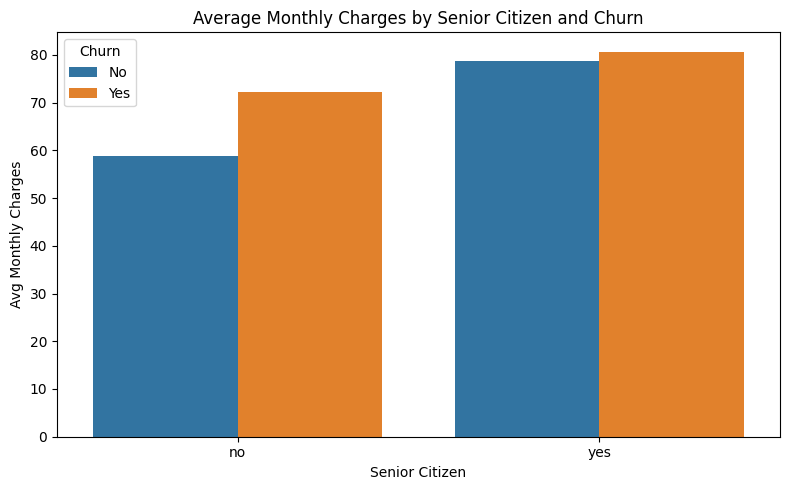

In [917]:
'''

monthly charnges  float
senior citizen yes no
churn   yes no

'''
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Group by SeniorCitizen and Churn, calculate average MonthlyCharges
avg_charges = df.groupby(['SeniorCitizen', 'Churn'])['MonthlyCharges'].mean().reset_index()

# Plot barplot
plt.figure(figsize=(8, 5))
sns.barplot(data=avg_charges, x='SeniorCitizen', y='MonthlyCharges', hue='Churn')

plt.title('Average Monthly Charges by Senior Citizen and Churn')
plt.xlabel('Senior Citizen')
plt.ylabel('Avg Monthly Charges')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()



C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10824\1668901240.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=charges, palette='coolwarm')


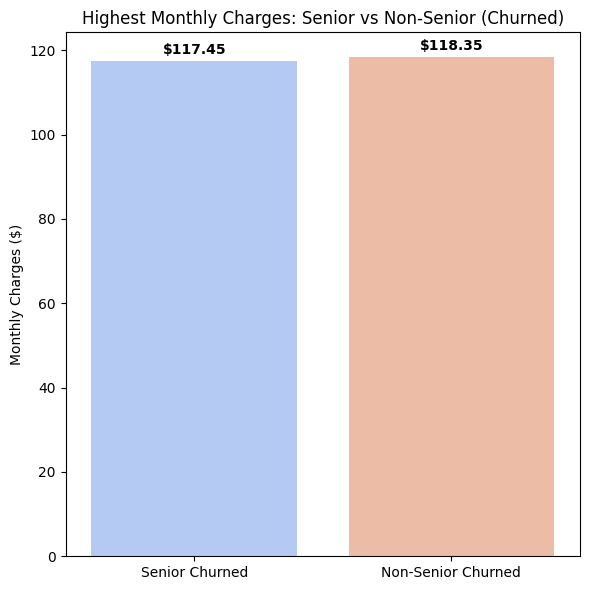

In [918]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter churned senior and non-senior citizens
senior_churned = df[(df['SeniorCitizen'] == 'yes') & (df['Churn'] == 'Yes')]
non_senior_churned = df[(df['SeniorCitizen'] == 'no') & (df['Churn'] == 'Yes')]

# Get highest monthly charge from each group
highest_senior = senior_churned['MonthlyCharges'].max()
highest_non_senior = non_senior_churned['MonthlyCharges'].max()

# Prepare data
labels = ['Senior Churned', 'Non-Senior Churned']
charges = [highest_senior, highest_non_senior]

# Plot
plt.figure(figsize=(6, 6))
sns.barplot(x=labels, y=charges, palette='coolwarm')

# Add values on top of bars
for i, val in enumerate(charges):
    plt.text(i, val + 1, f"${val:.2f}", ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title('Highest Monthly Charges: Senior vs Non-Senior (Churned)')
plt.ylabel('Monthly Charges ($)')
plt.tight_layout()
plt.show()



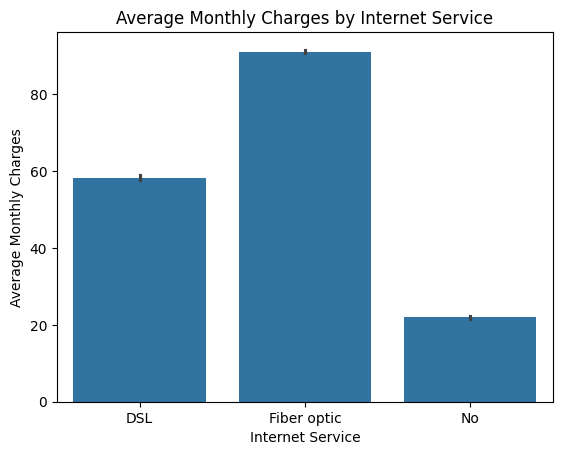

In [919]:
# Plotting the bar chart showing average Monthly Charges by Internet Service
sns.barplot(x='InternetService', y='MonthlyCharges', data=df, estimator='mean')

# Displaying the plot
plt.title('Average Monthly Charges by Internet Service')
plt.xlabel('Internet Service')
plt.ylabel('Average Monthly Charges')
plt.show()

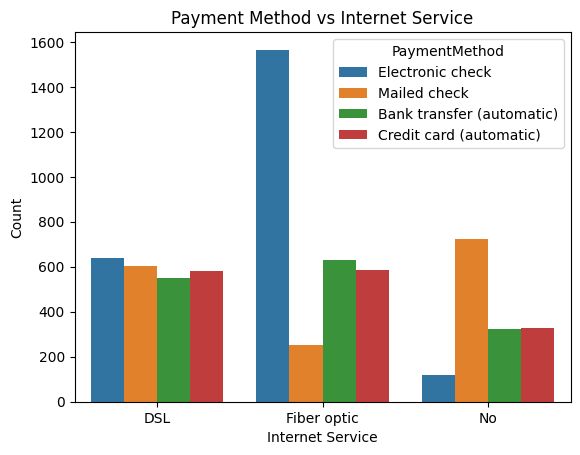

In [920]:
# Plotting the count plot to show Payment Method vs Internet Service
sns.countplot(x='InternetService', hue='PaymentMethod', data=df)

# Displaying the plot
plt.title('Payment Method vs Internet Service')
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.show()

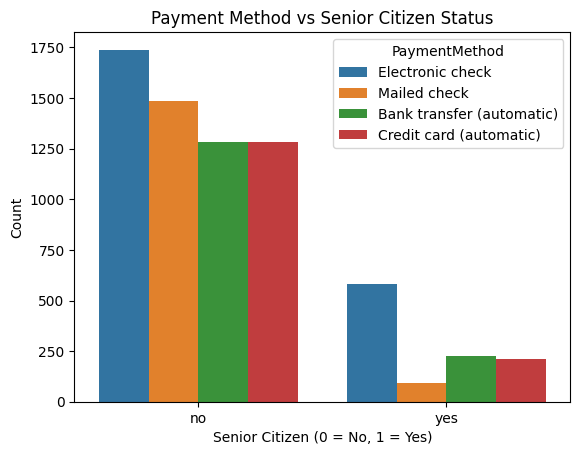

In [921]:
# Plotting the count plot to show Payment Method vs Senior Citizen status
sns.countplot(x='SeniorCitizen', hue='PaymentMethod', data=df)

# Displaying the plot
plt.title('Payment Method vs Senior Citizen Status')
plt.xlabel('Senior Citizen (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

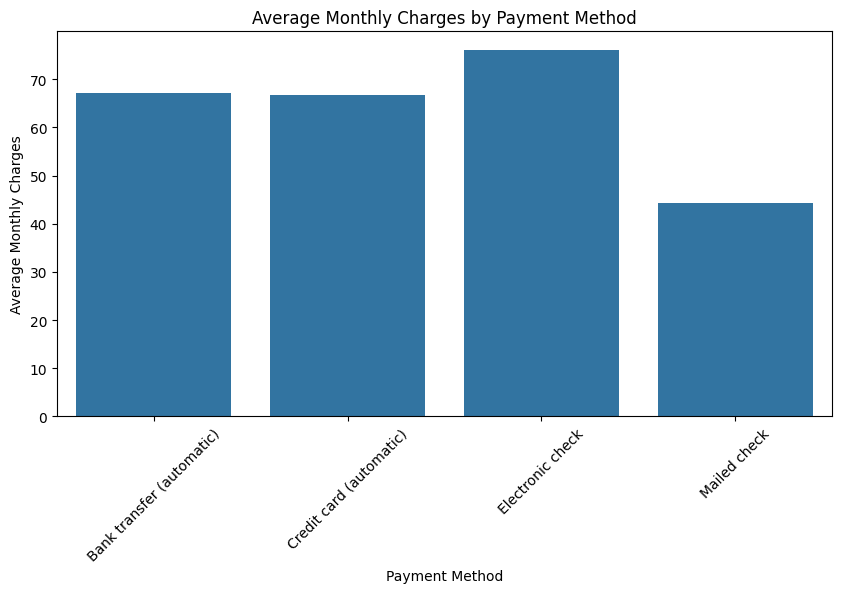

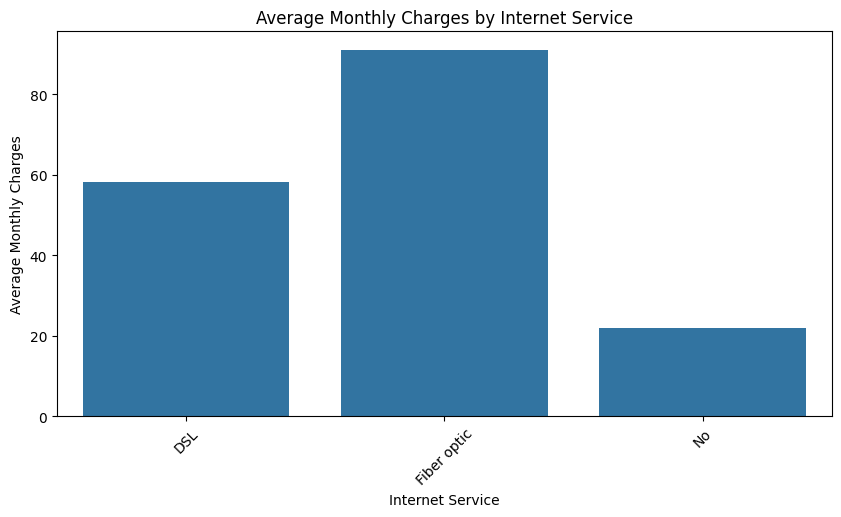

In [922]:
# Grouping by Payment Method and calculating the mean Monthly Charges
payment_method_avg = df.groupby('PaymentMethod')['MonthlyCharges'].mean().reset_index()

# Grouping by Internet Service and calculating the mean Monthly Charges
internet_service_avg = df.groupby('InternetService')['MonthlyCharges'].mean().reset_index()

# Plotting Payment Method vs Average Monthly Charges
plt.figure(figsize=(10, 5))
sns.barplot(x='PaymentMethod', y='MonthlyCharges', data=payment_method_avg)
plt.title('Average Monthly Charges by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Average Monthly Charges')
plt.xticks(rotation=45)
plt.show()

# Plotting Internet Service vs Average Monthly Charges
plt.figure(figsize=(10, 5))
sns.barplot(x='InternetService', y='MonthlyCharges', data=internet_service_avg)
plt.title('Average Monthly Charges by Internet Service')
plt.xlabel('Internet Service')
plt.ylabel('Average Monthly Charges')
plt.xticks(rotation=45)
plt.show()

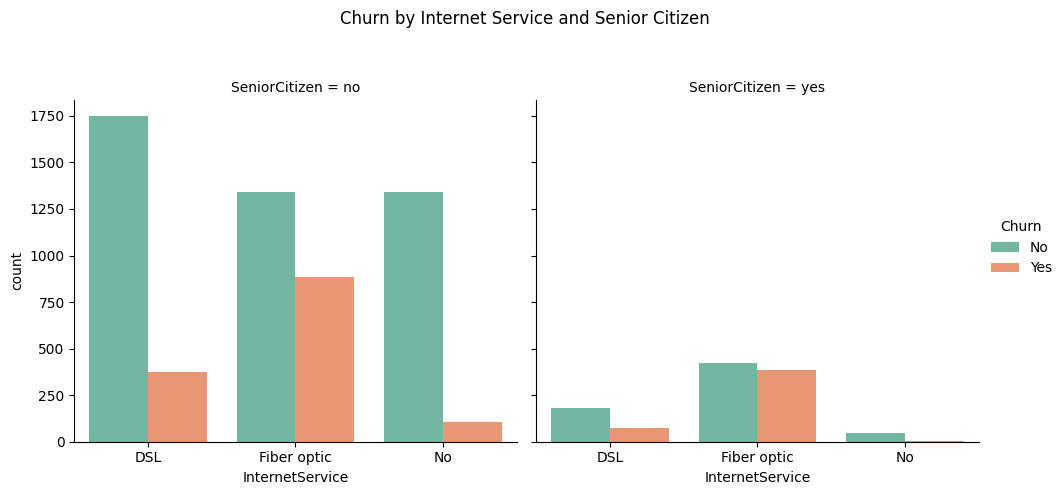

In [923]:
import seaborn as sns
import matplotlib.pyplot as plt

# Split by SeniorCitizen and plot InternetService vs Churn
sns.catplot(x='InternetService', hue='Churn', col='SeniorCitizen', data=df,
            kind='count', palette='Set2', height=5, aspect=1)

plt.subplots_adjust(top=0.8)
plt.suptitle('Churn by Internet Service and Senior Citizen')
plt.show()


# most non senior citizen are churn usage of fiber optic  

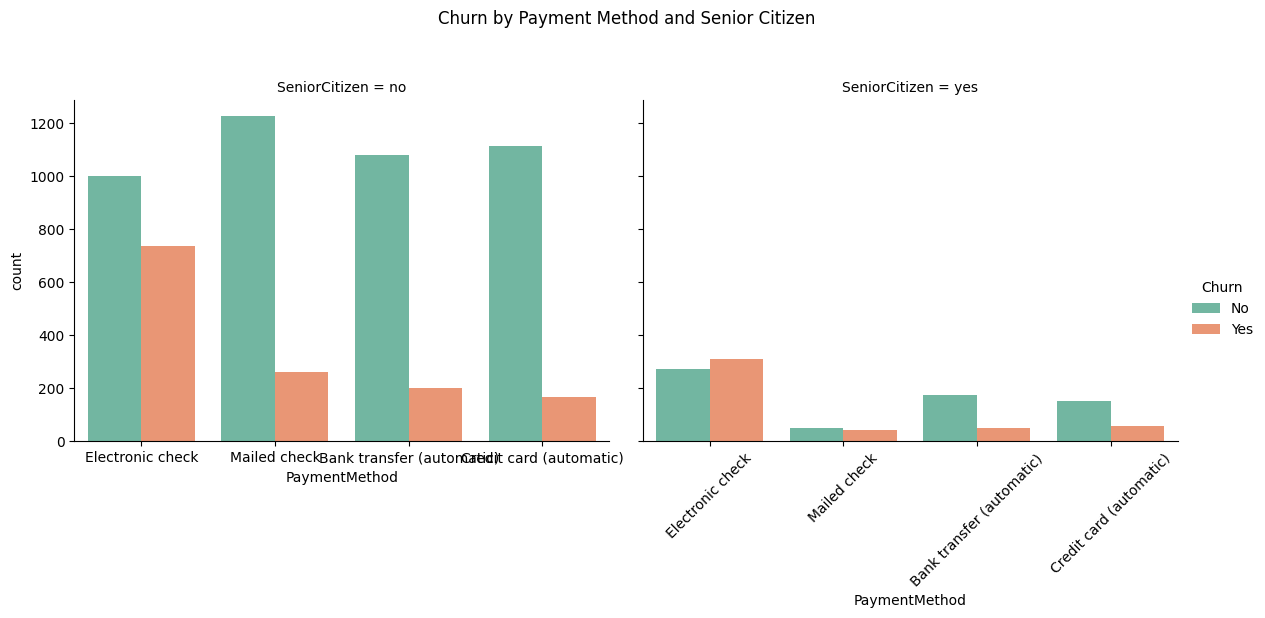

In [924]:
import seaborn as sns
import matplotlib.pyplot as plt

# Split by SeniorCitizen and plot PaymentMethod vs Churn
sns.catplot(x='PaymentMethod', hue='Churn', col='SeniorCitizen', data=df,
            kind='count', palette='Set2', height=5, aspect=1.2)

plt.subplots_adjust(top=0.8)
plt.suptitle('Churn by Payment Method and Senior Citizen')
plt.xticks(rotation=45)
plt.show()


In [925]:
print(df.dtypes)
print(df.isnull().sum().sum())

customerID            object
gender                object
SeniorCitizen         object
Period               float64
PhoneService          object
InternetService       object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
Contract              object
PaymentMethod         object
MonthlyCharges       float64
Churn                 object
ChargeBin           category
RoundedCharges       float64
dtype: object
0


In [926]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# import itertools

# # Assuming 'df' is your DataFrame

# # Filter only churned customers
# df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})  # Convert 'Yes'/'No' to 1/0
# df['SeniorCitizen'] = df['SeniorCitizen'].map({'Yes': 1, 'No': 0})  # Convert 'Yes'/'No' to 1/0

# # Filter only churned customers
# churned_df = df[df['Churn'] == 1].copy()  # Only churned customers (Churn == 1)

# # Define fixed categories for 'PaymentMethod'
# payment_order = ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)']
# internet_services = churned_df['InternetService'].unique()
# senior_status = [0, 1]
# monthly_bins = [0, 30, 60, 90, 120]
# monthly_labels = ['0-30', '30-60', '60-90', '90+']

# # Ensure proper category order
# churned_df['PaymentMethod'] = pd.Categorical(churned_df['PaymentMethod'], categories=payment_order, ordered=True)
# churned_df['MonthlyChargesRange'] = pd.cut(churned_df['MonthlyCharges'], bins=monthly_bins, labels=monthly_labels, right=False)

# # Create all possible combinations
# combinations = pd.DataFrame(list(itertools.product(
#     senior_status,
#     payment_order,
#     internet_services,
#     monthly_labels
# )), columns=['SeniorCitizen', 'PaymentMethod', 'InternetService', 'MonthlyChargesRange'])

# # Ensure matching column types
# combinations['SeniorCitizen'] = combinations['SeniorCitizen'].astype(int)
# churned_df['SeniorCitizen'] = churned_df['SeniorCitizen'].astype(int)

# # Group by all required categories
# grouped = churned_df.groupby(['SeniorCitizen', 'PaymentMethod', 'InternetService', 'MonthlyChargesRange']).size().reset_index(name='churned_count')

# # Merge combinations with grouped data to include all combinations, even if the count is 0
# grouped = combinations.merge(grouped, on=['SeniorCitizen', 'PaymentMethod', 'InternetService', 'MonthlyChargesRange'], how='left')
# grouped['churned_count'] = grouped['churned_count'].fillna(0)

# # Plot
# g = sns.catplot(
#     data=grouped,
#     x='PaymentMethod',
#     y='churned_count',
#     hue='InternetService',
#     col='SeniorCitizen',
#     row='MonthlyChargesRange',
#     kind='bar',
#     height=5,
#     aspect=2,
#     palette='Set2'
# )

# g.set_titles("Senior: {col_name} | Charges: {row_name}")
# g.set_axis_labels("Payment Method", "Churned Customers")
# g.set_xticklabels(rotation=45)
# plt.subplots_adjust(top=0.9)
# g.fig.suptitle("Churned Customers by Payment, Internet Service, Senior Status & Monthly Charges")
# plt.show()


In [927]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Step 1: Map 'Yes'/'No' to 1/0
# df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
# df['SeniorCitizen'] = df['SeniorCitizen'].map({'Yes': 1, 'No': 0})

# # Step 2: Filter only churned customers
# churned_df = df[df['Churn'] == 1].copy()

# # Step 3: Set order for PaymentMethod
# payment_order = ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)']
# churned_df['PaymentMethod'] = pd.Categorical(churned_df['PaymentMethod'], categories=payment_order, ordered=True)

# # Step 4: Create the bar plot
# plt.figure(figsize=(12, 6))
# sns.countplot(data=churned_df, x='PaymentMethod', hue='InternetService', palette='Set2')

# # Customize
# plt.title('Churned Customers by Payment Method and Internet Service')
# plt.xlabel('Payment Method')
# plt.ylabel('Churned Customer Count')
# plt.xticks(rotation=45)
# plt.legend(title='Internet Service')
# plt.tight_layout()

# # Show plot
# plt.show()
